Network models chapther 12 

Functions

In [10]:
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt
def CreatErdosRenyiGraph(n0,p,c=np.NaN,m=np.NaN,nEnd=np.NaN):
    if ~np.isnan(m):
        p=1
        matrix=CreateDataToAdjencyGraph(n0,p,np.NaN)
        matrix=AddN0Nodes(matrix,m,nEnd)

    else:
        matrix=CreateDataToAdjencyGraph(n0,p,c)

    n=len(matrix)
    G = nx.from_numpy_array(matrix)
    fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.set_box_aspect(1)
    nx.draw(G,pos=nx.circular_layout(G) ,with_labels=False, node_color='orange', node_size=int(100), font_weight='bold',ax=ax1)
    ax1.set_title(' n='+str(n)+' p='+str(p)+' c='+str(c))
    if np.isnan(c):
        ax2.set_box_aspect(1)
        histArray=np.count_nonzero(matrix, axis=1)
        weights = np.ones_like(histArray) / len(histArray)
        ax2.hist(histArray,np.max(histArray), weights=weights,rwidth=0.9,label='Simulated distribution')
    
        xRange=np.arange(int(np.min(histArray*0.9)), int(np.max(histArray)*1.1)+1, 1, dtype=int)
        yGeneric=[]
        for x in xRange:
            yGeneric.append(ProbGenericFunction(n,p,x))
        ax2.plot(xRange,yGeneric,label='Theoretical distribution')
        ax2.legend()
    elif np.isnan(m): 
        p=0.1
        matrixRewire=RandomlyRewireConnections(matrix,p)
        G = nx.from_numpy_array(matrixRewire)
        ax2.set_box_aspect(1)
        nx.draw(G,pos=nx.circular_layout(G) ,with_labels=False, node_color='orange', node_size=int(100), font_weight='bold',ax=ax2)

        ax2.set_title(' n='+str(n)+' p='+str(p)+' c='+str(c))
    else: 
        D=np.count_nonzero(matrix,axis=0)
        D=np.cumsum(D)
        u=np.arange(1,n+1)/(n)
        print(u[-1])

        ax2.loglog(np.flip(D),u,'o')


    
    plt.show()
def ProbGenericFunction(n,p,k):
    binomial=math.comb(n-1, k)
    return  binomial*(p**k)*(1-p)**(n-1-k)

def CreateDataToAdjencyGraph(n,p,c):
    A=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if np.isnan(c):
                if j>i:
                    r=np.random.random()
                    if r<p:
                        A[i,j]=1
                        A[j,i]=1
            else: 
                if NormPerodic(i,j,c,n):
                    A[i,j]=1
                    A[j,i]=1
    if np.isnan(c):
        A=RandomlyRewireConnections(A,p)

                    
    return(A)

def NormPerodic(i,j,c,n):
    diff = abs(i - j)
    distance = min(diff, n - diff)  #perodic boundery 
    return 1 <= distance <= c/2
        
def RandomlyRewireConnections(A,p):
    n=len(A)
    for i in range(n):
        for j in range(n):
            if A[i,j]==1:
                if p>np.random.random():
                    posibleChoices = list(range(i)) + list(range(i+1, n))
                    jNew=np.random.choice(posibleChoices)
                    A[i,j]=0 
                    A[i,jNew]=1
    return A


def AddN0Nodes(A,m,nEnd):
    n0=np.shape(A)[0]
    for i in range (nEnd-n0):
        A=AddNodeAndConnectIt(A,m)
    return(A)

def AddNodeAndConnectIt(A,m):
    n=len(A)
    A=np.insert(A, n, 0, axis=0)
    A=np.insert(A, n, 0, axis=1)
    nConections=np.count_nonzero(A,axis=0)
    probConections= nConections/sum(nConections)
    i=np.random.choice(np.arange(n+1),m, replace=False,p=probConections)
    A[n,i]=1
    A[i,n]=1
    return A









                
def SubPlotAdjencyGraph():
    pass


12.1

In [40]:
#Constants
n=10

12.1

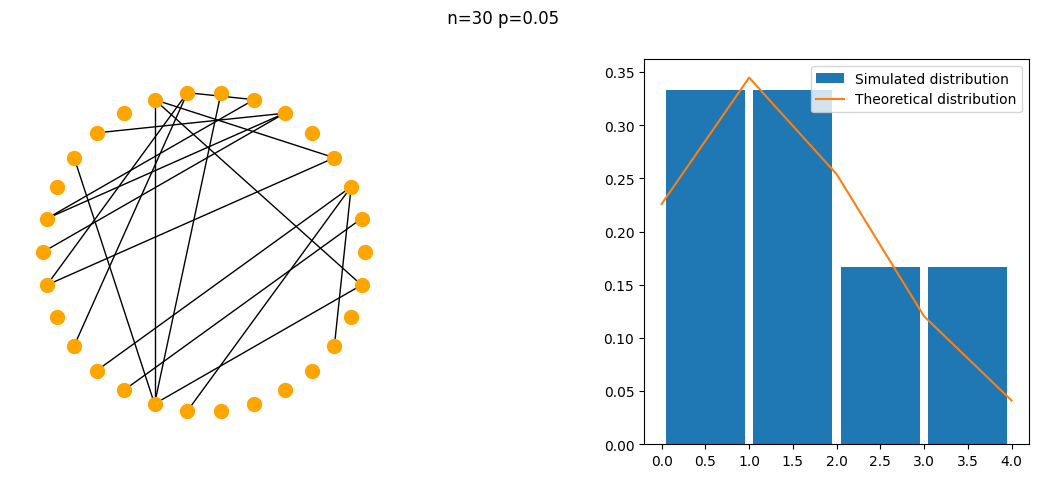

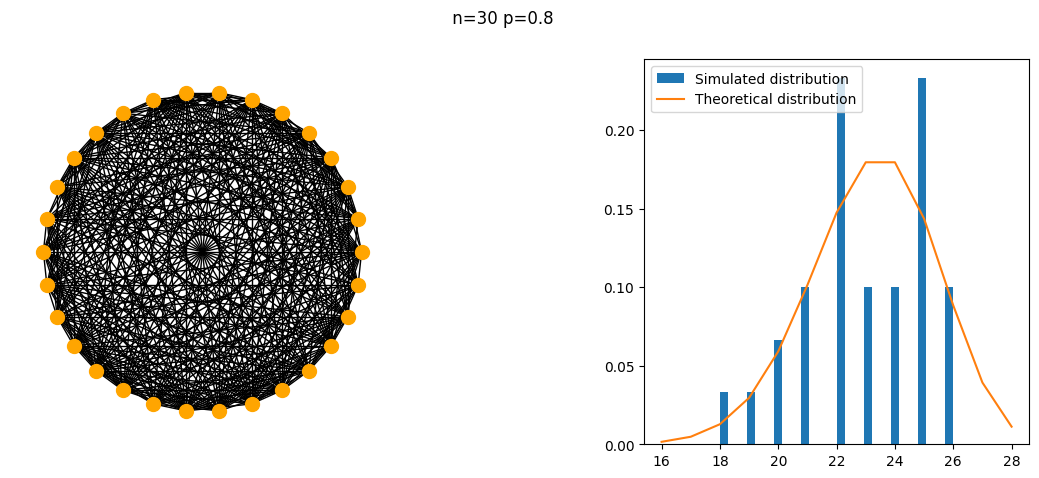

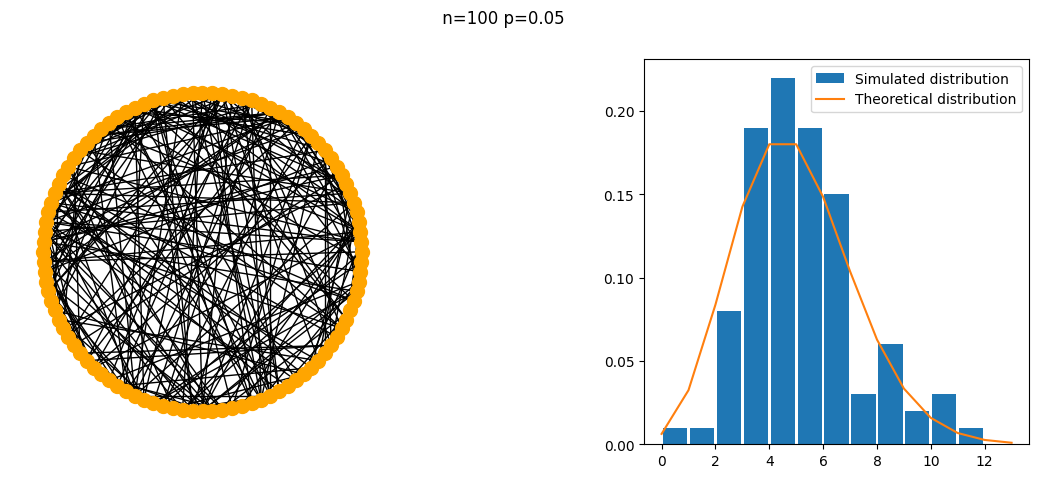

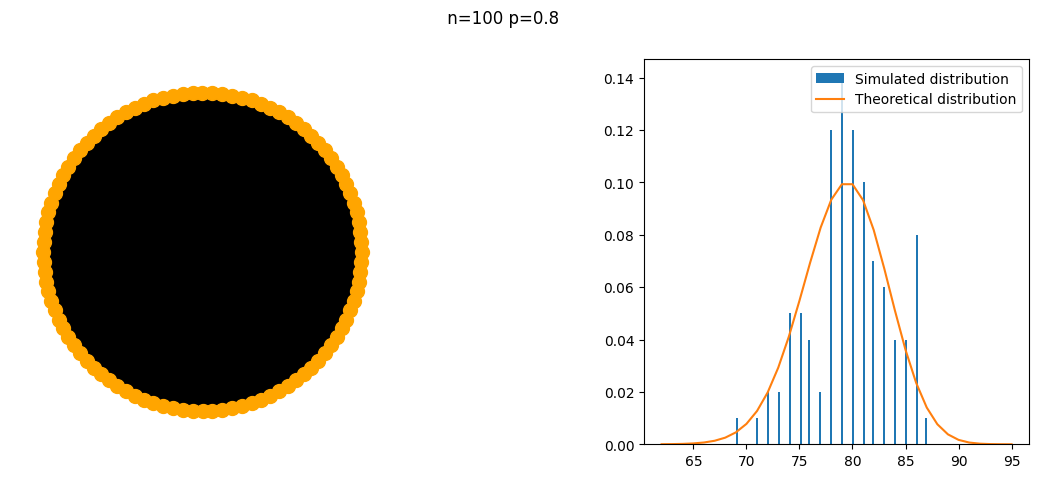

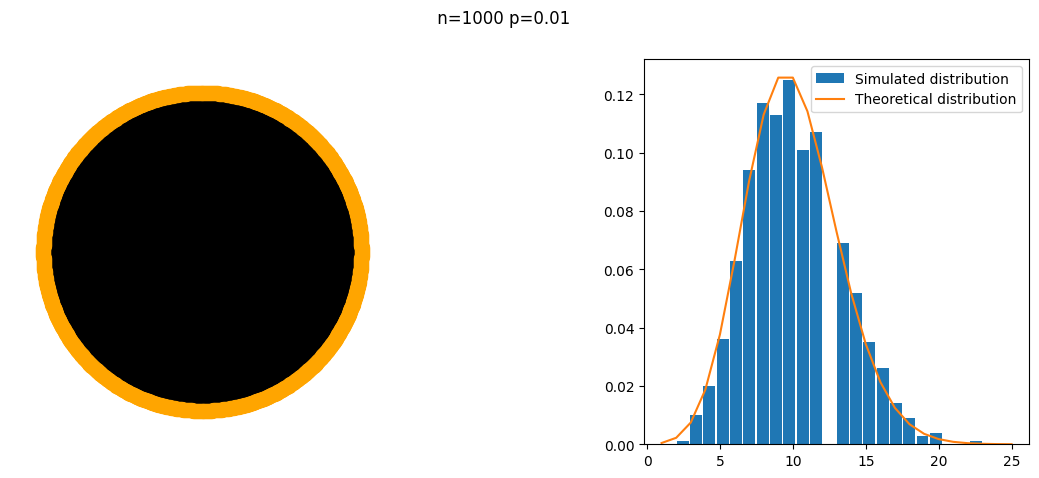

In [207]:
CreatErdosRenyiGraph(30,0.05)
CreatErdosRenyiGraph(30,0.8)
CreatErdosRenyiGraph(100,0.05)
CreatErdosRenyiGraph(100,0.8)
CreatErdosRenyiGraph(1000,0.01)

12.2 The Watts–Strogatz small-world model

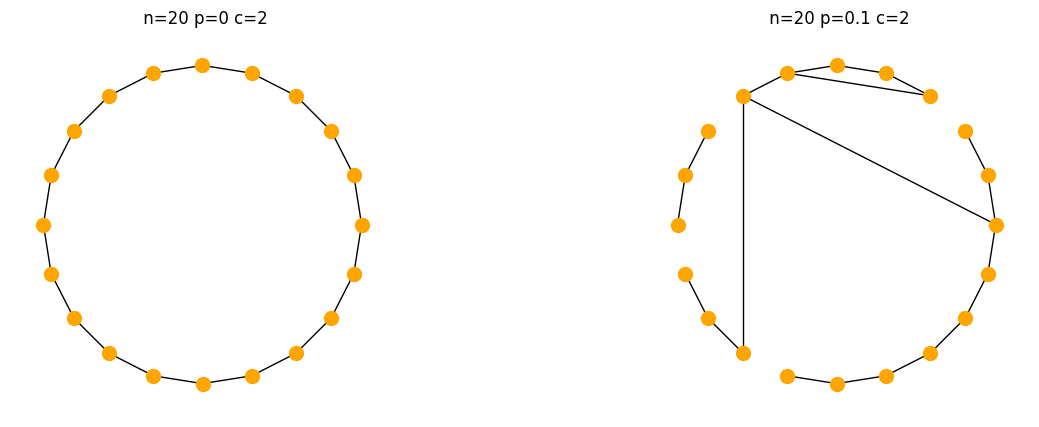

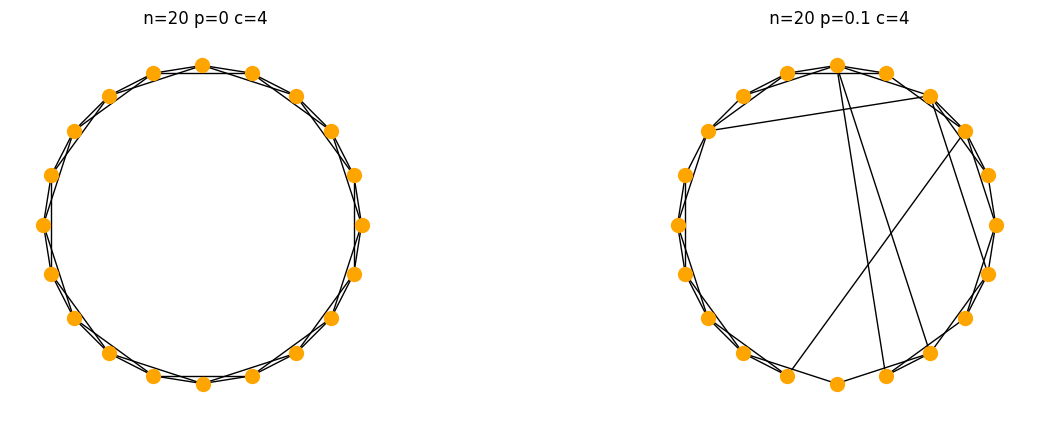

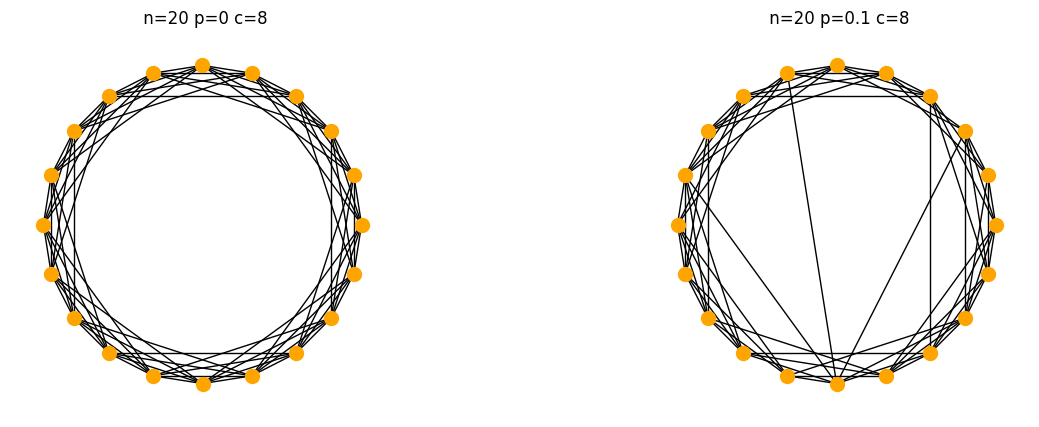

In [417]:
CreatErdosRenyiGraph(20,0,2)
CreatErdosRenyiGraph(20,0,4)
CreatErdosRenyiGraph(20,0,8)

12.3

1.0


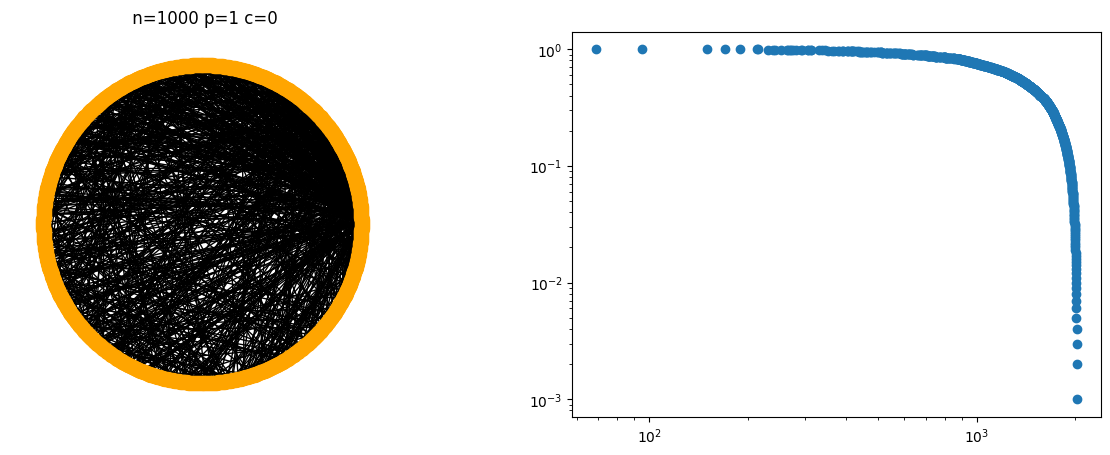

In [11]:
CreatErdosRenyiGraph(10,3,0,1,1000)